In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import random
import copy
from collections import defaultdict
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings(action = 'ignore')
plt.rcParams['font.family'] = 'KBIZmjo M'
%matplotlib inline

In [5]:
train = pd.read_csv('Desktop/데이터분석/titanic/train.csv')
test = pd.read_csv('Desktop/데이터분석/titanic/test.csv')

In [6]:
train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [6]:
test.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


----------------------------
# 데이터 타입 변환

In [7]:
#Name 칭호 분리 후 인덱스 부여 
train_set,test_set= set(),set()
for i,ind in zip(train['Name'], train.index):
    name_i = i.split(',')[1].split('.')[0].strip()
    train_set.add(name_i)
    train['Name'].iloc[ind:ind+1] =name_i
    
for i,ind in zip(test['Name'], test.index):
    name_i = i.split(',')[1].split('.')[0].strip()
    test_set.add(name_i)
    test['Name'].iloc[ind:ind+1] =name_i

In [10]:
train_set

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [8]:
test_set

{'Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'}

------------
Dona는 Mrs와 같고

Don은 Mr와 같으므로 합치자

In [22]:
train.loc[train.Name =='Don','Name'] = 'Mr'
test.loc[test.Name =='Dona','Name']='Mrs'

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train.Name.describe()

count     891
unique     16
top        Mr
freq      518
Name: Name, dtype: object

In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
test.Name.describe()

count     418
unique      8
top        Mr
freq      240
Name: Name, dtype: object

In [27]:
#칭호에 따른 생존 확률
name_surv = defaultdict(int)
name_cnt = defaultdict(int)
for i,s in zip(train.Name,train.Survived):
    name_surv[i]+=s
    name_cnt[i] += 1
name_surv_pct = defaultdict(float)
for k,v in name_cnt.items():
    name_surv_pct[k] = name_surv[k]/name_cnt[k]

name_surv_df = pd.DataFrame([name_surv_pct.values(),name_cnt.values()],columns = name_surv_pct.keys(),index =['surv_pct','total_cnt']).transpose()
name_surv_df

,surv_pct,total_cnt
Mr,0.156371,518.0
Mrs,0.792000,125.0
Miss,0.697802,182.0
Master,0.575000,40.0
Rev,0.000000,6.0
Dr,0.428571,7.0
Mme,1.000000,1.0
Ms,1.000000,1.0
Major,0.500000,2.0
Lady,1.000000,1.0


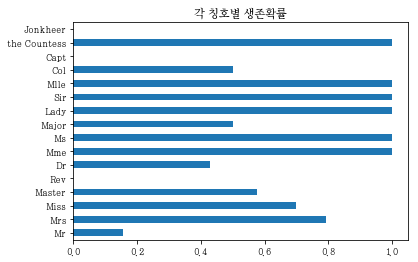

In [28]:

name_surv_df['surv_pct'].plot.barh()
plt.title('각 칭호별 생존확률')
plt.show()

----------------
name이 Mr,Mrs,Miss인 승객을 주목하면 되겠다.왜냐하면 다른 name을 가진 승객은 드물기 때문에 일반화 할 수 없다.

name이 Mr인 승객은 가장 많고, 생존확률도 가장 낮다.

name이 Mrs,Miss인 승객은 생존확률이 모두 60%가 넘는다.

학습에 쓰일 피처로 선택해도 될 것 같다..?(아주 의미 없진 않을 듯)

## 범주형 데이터 string -> int

In [31]:
object_col = ['Sex', 'Embarked','Name']
for c in object_col:
    train[c] = train[c].astype('category')
    test[c] = test[c].astype('category')
    
train['Sex'].cat.categories = [1,2]
test['Sex'].cat.categories = [1,2]
train['Embarked'].cat.categories = [1,2,3]
test['Embarked'].cat.categories = [1,2,3]
train['Name'].cat.categories = [i for i in range(1,len(train_set))]#Don 삭제
test['Name'].cat.categories= [i for i in range(1,len(test_set))]#Dona삭제

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 66.3+ KB


In [33]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,11,2,22.0,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,12,1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,8,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,12,1,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,11,2,35.0,0,0,373450,8.0500,NaN,3


In [34]:
train.info() #Ticket과 Cabin은 활용하지 않을 것같아서 일단 보류

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 66.3+ KB


-----------------
# 나머지 결측치 처리(Age, Cabin 제외)

In [35]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## train의 Embarked  -  최빈값으로 채우기

In [37]:
train.Embarked.describe()

count     889
unique      3
top         3
freq      644
Name: Embarked, dtype: int64

In [38]:
train.Embarked.fillna(3, inplace = True)

In [39]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## test의 Fare  -  mean으로 채우기

In [40]:
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [41]:
test.Fare.fillna(test.Fare.mean(), inplace = True)

In [42]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

----------------------
# Cabin 결측치 처리

## 있는 사람, 없는 사람으로 구분

In [43]:
#0(결측치 없다)으로 초기화
train['Cabin_null'] = [0 for _ in range(len(train))]
test['Cabin_null'] = [0 for _ in range(len(test))]

In [44]:
#Cabin이 null인 승객들 1로
for i in train.loc[train.Cabin.isnull()].index:
    train['Cabin_null'].iloc[i]= 1
    
for i in test.loc[test.Cabin.isnull()].index:
    test['Cabin_null'].iloc[i] = 1

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null category
Cabin_null     891 non-null int64
dtypes: category(3), float64(2), int64(6), object(2)
memory usage: 73.2+ KB


In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,11,2,22.0,1,0,A/5 21171,7.2500,NaN,3,1
1,2,1,1,12,1,38.0,1,0,PC 17599,71.2833,C85,1,0
2,3,1,3,8,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3,1
3,4,1,1,12,1,35.0,1,0,113803,53.1000,C123,3,0
4,5,0,3,11,2,35.0,0,0,373450,8.0500,NaN,3,1


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null category
Sex            418 non-null category
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null category
Cabin_null     418 non-null int64
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,892,3,5,2,34.5,0,0,330911,7.8292,NaN,2,1
1,893,3,6,1,47.0,1,0,363272,7.0000,NaN,3,1
2,894,2,5,2,62.0,0,0,240276,9.6875,NaN,2,1
3,895,3,5,2,27.0,0,0,315154,8.6625,NaN,3,1
4,896,3,6,1,22.0,1,1,3101298,12.2875,NaN,3,1


## 컬럼 삭제(보류)

In [39]:
# train.drop('Cabin', axis= 1,inplace = True)
# train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
dtypes: category(3), float64(2), int64(5), object(1)
memory usage: 59.3+ KB


------------------
# Age 결측치 처리

In [49]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## 해당 행만 삭제


In [50]:
train_del = train.drop(train.loc[train.Age.isnull()].index) 
train_del.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_null
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.740896
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.438450
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,1.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


In [51]:
train_del.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_null
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.740896
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.438450
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,1.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


## mean

In [52]:
train_mean = copy.deepcopy(train)
train_mean['Age'].fillna(train_mean.Age.mean(), inplace = True)

In [53]:
train_mean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_null
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.771044
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [54]:
test_mean = copy.deepcopy(test)
test_mean['Age'].fillna(test_mean.Age.mean(), inplace = True)

## median

In [55]:
train_median = copy.deepcopy(train)
train_median['Age'].fillna(train_median.Age.median(), inplace = True)

In [56]:
train_median.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_null
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.771044
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [57]:
test_median = copy.deepcopy(test)
test_median['Age'].fillna(test_median.Age.median(), inplace = True)

-----------------------
# SibSp + Parch => Family로 압축

In [58]:
train['Family'] = train['SibSp'] + train['Parch']

In [59]:
train_mean['Family'] = train['SibSp'] + train['Parch']
train_median['Family'] = train['SibSp'] + train['Parch']
train_del['Family'] = train['SibSp'] + train['Parch']

test_mean['Family'] = test['SibSp'] + test['Parch']
test_median['Family'] = test['SibSp'] + test['Parch']



In [60]:
test['Family'] =  test['SibSp']+train['Parch']

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null category
Cabin_null     891 non-null int64
Family         891 non-null int64
dtypes: category(3), float64(2), int64(7), object(2)
memory usage: 80.2+ KB


--------------------------------------
## 정리

- feature로 선택 가능한 것은, Name, Sex, Age, Ticket, Fare, Embarked, Family, Cabin_null


- Sex, Embarked는 [1,2], [1,2,3]으로 카테고리화


- Name은 칭호 분리 후 인덱싱


- Cabin은 Cabin_null로 결측여부 표시


- Age 결측치 처리 방식에 따라 학습 데이터와 테스트 데이터 구분
    
    - del
    - mean
    - median


- 나머지 결측치는 양이 많지 않아서 모두 평균 또는 빈도수(범주형)가 많은 것으로 대체


- SibSp와 Parch를 더한 값인 Family 컬럼 추가

# 피처 선택

In [63]:
tmp_feature = ['Pclass', 'Age', 'Name','Fare','SibSp','Parch','Family','Cabin_null']

In [64]:
train[tmp_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Age           714 non-null float64
Name          891 non-null category
Fare          891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Family        891 non-null int64
Cabin_null    891 non-null int64
dtypes: category(1), float64(2), int64(5)
memory usage: 50.4 KB


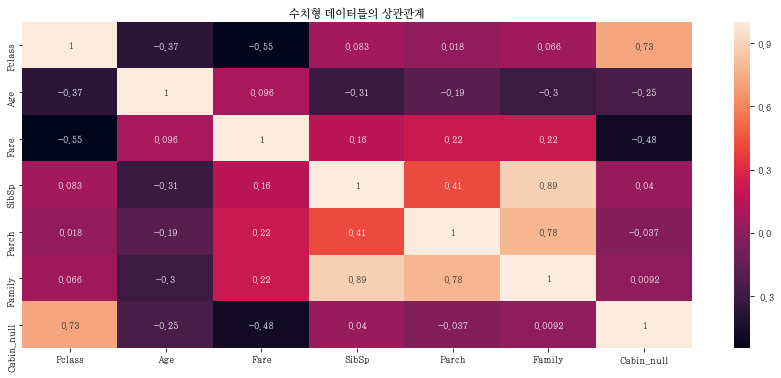

In [65]:
#표준화+상관관계분석
import scipy.stats as ss
plt.figure(figsize = (15,6))
plt.title('수치형 데이터들의 상관관계')
sns.heatmap(train[tmp_feature].corr(),annot = True)
plt.show()

-------------------
0.7 ~ 1.0 : 강한 양적 상관관계

0.3 ~ 0.7 : 뚜렷한 양적 상관관계

0.1 ~ 0.3 : 약한 양적 상관관계

-0.1 ~ 0.1 : 상관관계 거의 없음

-0.3 ~ -0.1 : 약한 음적 상관관계

-0.7 ~ -0.3 : 뚜렷한 음적 상관관계

-1.0 ~ -0.7 : 강한 음적 상관관계


위 기준에 따르면, 

Pclass와 Age -> 뚜렷한 음적 상관관계

Fare와 Pclass -> 뚜렷한 음적 상관관계

SibSp와 Parch -> 뚜렷한 양적 상관관계

SibSp와 Age -> 뚜렷한 음적 상관관계

Family와 Age -> 뚜렷한 음적 상관관계

Family와 SibSp,Parch -> 강한 양적 상관관계

Pclass와 Cabin_null -> 강한 양적 상관관계

Fare와 Cabin_null -> 뚜렷한 음적 상관관계

로 해석할 수 있을 것 같다. 



<br><br>
*train_mean 또는 train_median에 적용하면 상관관계가 더 낮아짐*

## SibSp, Parch -> Family로 대체

Family와 SibSp, Parch는 강한 양적 상관관계를 보이고 다른 컬럼들과 상관관계도 큰 차이가 없으므로

SibSp,Parch를 Family로 대체해도 된다고 생각한다.


In [66]:
train.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Cabin_null,Family
0,1,0,3,11,2,22.0,A/5 21171,7.2500,NaN,3,1,1
1,2,1,1,12,1,38.0,PC 17599,71.2833,C85,1,0,1
2,3,1,3,8,1,26.0,STON/O2. 3101282,7.9250,NaN,3,1,0
3,4,1,1,12,1,35.0,113803,53.1000,C123,3,0,1
4,5,0,3,11,2,35.0,373450,8.0500,NaN,3,1,0


In [67]:
train_del.drop(['SibSp', 'Parch'],axis = 1, inplace = True)
train_mean.drop(['SibSp', 'Parch'],axis = 1, inplace = True)
train_median.drop(['SibSp', 'Parch'],axis = 1, inplace = True)

In [68]:
train_mean.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Cabin_null,Family
0,1,0,3,11,2,22.0,A/5 21171,7.2500,NaN,3,1,1
1,2,1,1,12,1,38.0,PC 17599,71.2833,C85,1,0,1
2,3,1,3,8,1,26.0,STON/O2. 3101282,7.9250,NaN,3,1,0
3,4,1,1,12,1,35.0,113803,53.1000,C123,3,0,1
4,5,0,3,11,2,35.0,373450,8.0500,NaN,3,1,0


<br><br>
다른 컬럼들은 앞에 New Titanic1에서 분석을 꽤 했다. 

그 결과, Sex, Pcalss, Family는 꼭 학습피처로 선택해야겠다는 결론을 내렸다. 

하지만 Cabin은 중요한 지표같으면서도 어떤식으로 처리해야할지 아이디어가 떠오르지 않았는데, 

이번에 Cabin_null을 추가하게 되어 분석을 좀 더 할 수 있게 되었다.

- Cabin_null과 Survived와의 관계

Text(0.5, 1.0, 'Cabin_null이 0일 때 사망여부 비율')

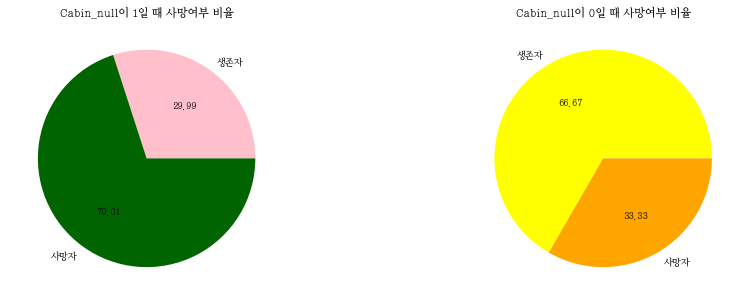

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
ax[0].pie([train.loc[train.Cabin_null ==  1].loc[train.Survived == 1].index.value_counts().sum(),  train.loc[train.Cabin_null ==  1].loc[train.Survived == 0].index.value_counts().sum()], labels= ['생존자', '사망자'], colors = ['pink','darkgreen'], autopct ='%.2f')
ax[0].set_title('Cabin_null이 1일 때 사망여부 비율')


ax[1].pie([train.loc[train.Cabin_null ==  0].loc[train.Survived == 1].index.value_counts().sum(),  train.loc[train.Cabin_null ==  0].loc[train.Survived == 0].index.value_counts().sum()],labels= ['생존자', '사망자'], colors = ['yellow','orange'], autopct ='%.2f')
ax[1].set_title('Cabin_null이 0일 때 사망여부 비율')
    

-------------------
Cabin_null도 Sex, Pclass, Family와 함께 중요한 요소다.

따라서 학습 피처를 선택할 때 위 네가지는 무조건 포함시켜야 한다. 

In [73]:
#피처 선택 -> Sex, Pclass, Faimly, Cabin_null 필수
feature = ['Pclass','Name', 'Sex', 'Age','Family', 'Cabin_null']
feature_no_age = ['Pclass','Name', 'Sex', 'Family', 'Cabin_null']
feature_no_name = ['Pclass','Age', 'Sex', 'Family', 'Cabin_null']

# 모델 적용 및 평가

## Recall  vs  Precision

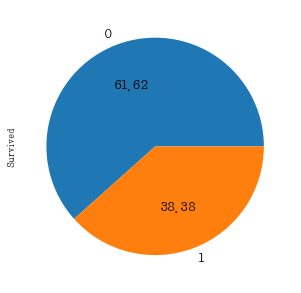

In [71]:
train.Survived.value_counts().plot.pie(figsize = (5,5),autopct = '%.2f',fontsize=15)
plt.show()

---------------------
train데이터는 사망자(False)가 61.62%를 차지하므로,

False Negatives 즉, 생존자를 사망자로 분류하는 것을 줄여야한다.

따라서 <strong>Recall이 더 중요한 평가지표</strong>이다.

<br><br>
## PR곡선 vs ROC곡선

In [53]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'Family'],
      dtype='object')

In [74]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

#model 적용 및 평가
def model_result(feature, x, model):
    x_train, x_test, y_train, y_test = train_test_split(x[feature], x['Survived'], test_size = 0.3)
    model.fit(x_train, y_train)
    print(confusion_matrix(model.predict(x_test), y_test),'\n\n')
    print(classification_report(model.predict(x_test), y_test))
    y_pred_proba = model.predict_proba(x_test)[::,1]
    #ROC곡선과 AUC
    fp,tp, thres = roc_curve(y_test,y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    print('\nAUC=',auc)
    plt.plot(fp,tp)
    plt.ylabel('TPR')
    plt.xlabel('FPR')
#     #PR곡선
#     precision,recall,thres = precision_recall_curve(y_test,y_pred_proba)
#     tmp_n =min(precision.shape[0], recall.shape[0], thres.shape[0])
#     plt.plot(thres, precision[:tmp_n], "b--", label='precision')
#     plt.plot(thres, recall[:tmp_n], "g-", label='recall')
#     plt.ylim([0, 1])
#     plt.xlabel("threshold")
#     plt.legend()
    plt.show()

In [75]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()

[[101  24]
 [ 21  69]] 


              precision    recall  f1-score   support

           0       0.83      0.81      0.82       125
           1       0.74      0.77      0.75        90

   micro avg       0.79      0.79      0.79       215
   macro avg       0.78      0.79      0.79       215
weighted avg       0.79      0.79      0.79       215


AUC= 0.8710118103296315


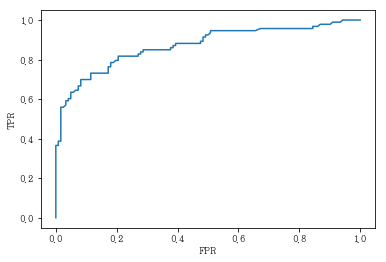

In [56]:
model_result(feature, train_del, log_clf)

[[146  32]
 [ 18  72]] 


              precision    recall  f1-score   support

           0       0.89      0.82      0.85       178
           1       0.69      0.80      0.74        90

   micro avg       0.81      0.81      0.81       268
   macro avg       0.79      0.81      0.80       268
weighted avg       0.82      0.81      0.82       268


AUC= 0.8861984052532833


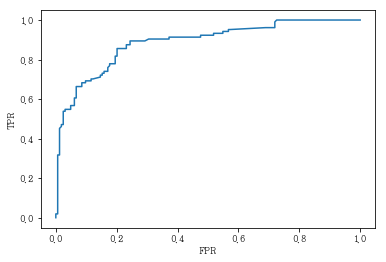

In [57]:
model_result(feature,train_median, log_clf)

[[140  23]
 [ 35  70]] 


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       163
           1       0.75      0.67      0.71       105

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268


AUC= 0.8569278033794162


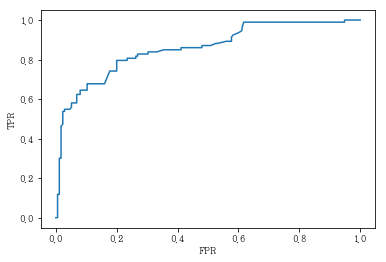

In [58]:
model_result(feature,train_mean, log_clf)

In [76]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()

[[106  63]
 [ 26  20]] 


              precision    recall  f1-score   support

           0       0.80      0.63      0.70       169
           1       0.24      0.43      0.31        46

   micro avg       0.59      0.59      0.59       215
   macro avg       0.52      0.53      0.51       215
weighted avg       0.68      0.59      0.62       215


AUC= 0.6416119021540709


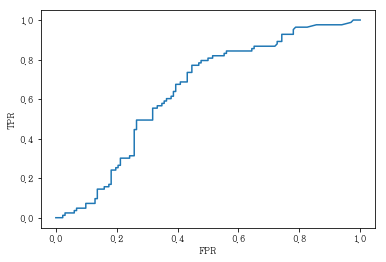

In [60]:
model_result(feature,train_del, nb_clf)

[[160  74]
 [ 15  19]] 


              precision    recall  f1-score   support

           0       0.91      0.68      0.78       234
           1       0.20      0.56      0.30        34

   micro avg       0.67      0.67      0.67       268
   macro avg       0.56      0.62      0.54       268
weighted avg       0.82      0.67      0.72       268


AUC= 0.6640860215053763


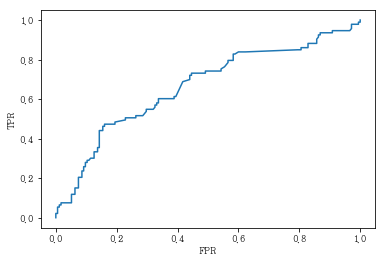

In [61]:
model_result(feature,train_median, nb_clf)

[[149  83]
 [ 20  16]] 


              precision    recall  f1-score   support

           0       0.88      0.64      0.74       232
           1       0.16      0.44      0.24        36

   micro avg       0.62      0.62      0.62       268
   macro avg       0.52      0.54      0.49       268
weighted avg       0.78      0.62      0.68       268


AUC= 0.6522323830016138


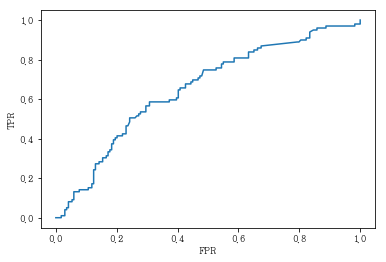

In [62]:
model_result(feature,train_mean, nb_clf)

-----------
위 나이브베이즈 모델은 Recall, AUC값을 보았을 때 성능이 좋지 않은것으로 보인다.

In [77]:
from sklearn import svm
svm_clf = svm.SVC(probability = True)

[[111  25]
 [ 21  58]] 


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       136
           1       0.70      0.73      0.72        79

   micro avg       0.79      0.79      0.79       215
   macro avg       0.77      0.78      0.77       215
weighted avg       0.79      0.79      0.79       215


AUC= 0.8308689302665206


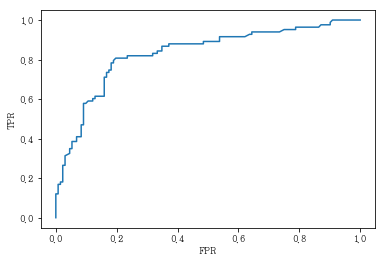

In [64]:
model_result(feature,train_del, svm_clf)

[[138  31]
 [ 26  73]] 


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       169
           1       0.70      0.74      0.72        99

   micro avg       0.79      0.79      0.79       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.79      0.79       268


AUC= 0.8314962476547842


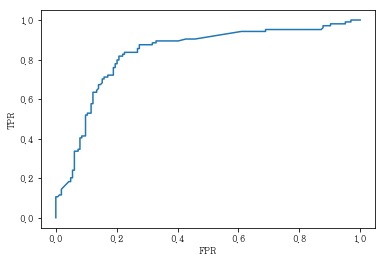

In [65]:
model_result(feature,train_median, svm_clf)

[[148  33]
 [ 26  61]] 


              precision    recall  f1-score   support

           0       0.85      0.82      0.83       181
           1       0.65      0.70      0.67        87

   micro avg       0.78      0.78      0.78       268
   macro avg       0.75      0.76      0.75       268
weighted avg       0.79      0.78      0.78       268


AUC= 0.8432685253118121


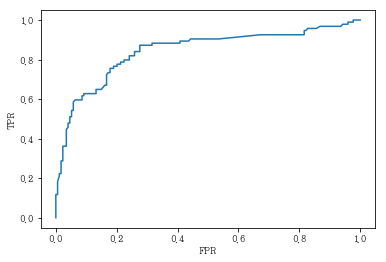

In [66]:
model_result(feature,train_mean, svm_clf)

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

[[119  21]
 [ 19  56]] 


              precision    recall  f1-score   support

           0       0.86      0.85      0.86       140
           1       0.73      0.75      0.74        75

   micro avg       0.81      0.81      0.81       215
   macro avg       0.79      0.80      0.80       215
weighted avg       0.82      0.81      0.81       215


AUC= 0.7927253905514776


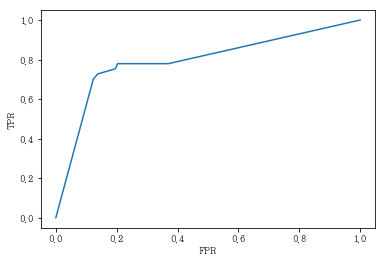

In [68]:
model_result(feature,train_del, dt_clf)

[[134  33]
 [ 31  70]] 


              precision    recall  f1-score   support

           0       0.81      0.80      0.81       167
           1       0.68      0.69      0.69       101

   micro avg       0.76      0.76      0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268


AUC= 0.7364518976169462


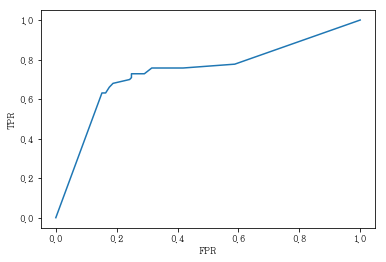

In [69]:
model_result(feature,train_median, dt_clf)

[[149  33]
 [ 24  62]] 


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       182
           1       0.65      0.72      0.69        86

   micro avg       0.79      0.79      0.79       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.79      0.79      0.79       268


AUC= 0.7485549132947977


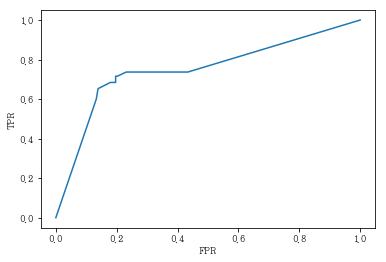

In [70]:
model_result(feature,train_mean, dt_clf)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

[[115  24]
 [ 14  62]] 


              precision    recall  f1-score   support

           0       0.89      0.83      0.86       139
           1       0.72      0.82      0.77        76

   micro avg       0.82      0.82      0.82       215
   macro avg       0.81      0.82      0.81       215
weighted avg       0.83      0.82      0.83       215


AUC= 0.8546962321975843


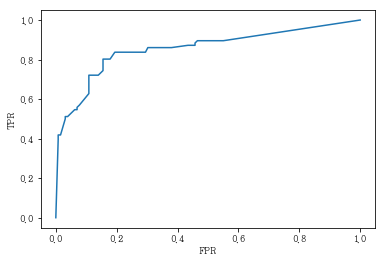

In [72]:
model_result(feature,train_del, rf_clf)

[[149  37]
 [ 16  66]] 


              precision    recall  f1-score   support

           0       0.90      0.80      0.85       186
           1       0.64      0.80      0.71        82

   micro avg       0.80      0.80      0.80       268
   macro avg       0.77      0.80      0.78       268
weighted avg       0.82      0.80      0.81       268


AUC= 0.8162989114445425


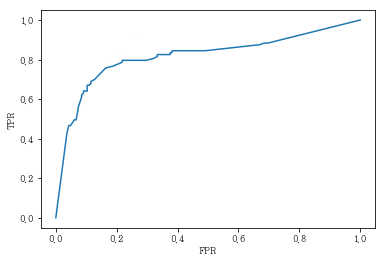

In [73]:
model_result(feature,train_median, rf_clf)

[[139  29]
 [ 30  70]] 


              precision    recall  f1-score   support

           0       0.82      0.83      0.82       168
           1       0.71      0.70      0.70       100

   micro avg       0.78      0.78      0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268


AUC= 0.8387125694818002


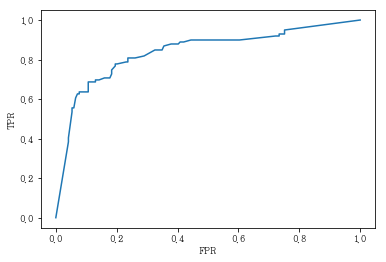

In [74]:
model_result(feature,train_mean, rf_clf)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

[[116  29]
 [ 10  60]] 


              precision    recall  f1-score   support

           0       0.92      0.80      0.86       145
           1       0.67      0.86      0.75        70

   micro avg       0.82      0.82      0.82       215
   macro avg       0.80      0.83      0.81       215
weighted avg       0.84      0.82      0.82       215


AUC= 0.8803727483502765


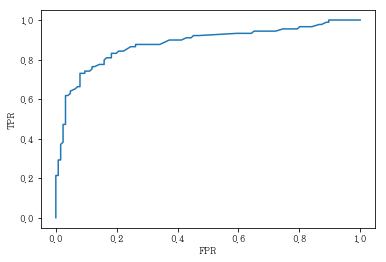

In [76]:
model_result(feature,train_del, gb_clf)

[[147  23]
 [ 24  74]] 


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       170
           1       0.76      0.76      0.76        98

   micro avg       0.82      0.82      0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268


AUC= 0.8655573642008801


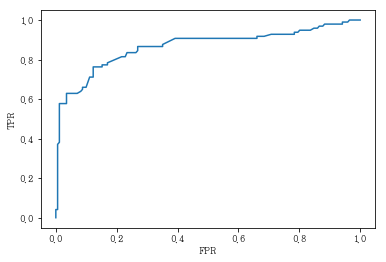

In [77]:
model_result(feature,train_median, gb_clf)

[[157  30]
 [ 15  66]] 


              precision    recall  f1-score   support

           0       0.91      0.84      0.87       187
           1       0.69      0.81      0.75        81

   micro avg       0.83      0.83      0.83       268
   macro avg       0.80      0.83      0.81       268
weighted avg       0.84      0.83      0.84       268


AUC= 0.8610707364341085


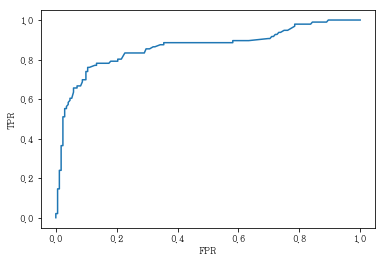

In [78]:
model_result(feature,train_mean, gb_clf)

# 최종 결과

In [81]:
feature

['Pclass', 'Name', 'Sex', 'Age', 'Family', 'Cabin_null']

In [82]:
feature_no_age

['Pclass', 'Name', 'Sex', 'Family', 'Cabin_null']

In [83]:
feature_no_name

['Pclass', 'Age', 'Sex', 'Family', 'Cabin_null']

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null category
Cabin_null     891 non-null int64
Family         891 non-null int64
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 66.3+ KB


In [85]:
#Survived, Ticket, PassengerId를 제외한 모든 컬럼 포함
feature_all= ['Pclass','Name', 'Sex','Age','Fare','Embarked','Family','Cabin_null']
#feature를 적게 
feature_min = ['Sex', 'Age','Family','Cabin_null']
feature2 = ['Pclass','Sex','Family','Fare','Cabin_null']

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null category
Cabin_null     891 non-null int64
Family         891 non-null int64
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 66.3+ KB


In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [101]:
score= cross_val_score(gb_clf, train_median[feature_no_name],train_median['Survived'], cv=10).mean()
score

0.8271995233231187

In [123]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_null,Family
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.782297,0.825359
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.840500,0.413179,1.267800
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,1.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,12.000000


In [124]:
model = gb_clf
x_train = train_del[feature_no_name]
model.fit(x_train, train_del['Survived'])
y_test = model.predict(test_mean[feature_no_name])

In [125]:
submission = pd.read_csv('Desktop/데이터분석/titanic/gender_submission.csv')
submission['Survived']= y_test
print('생존자 수')
submission['Survived'].loc[submission.Survived == 1].value_counts()

생존자 수


1    126
Name: Survived, dtype: int64

In [126]:
submission.to_csv('Desktop/데이터분석/titanic/submission_feature_no_name_train_del_gb.csv',index =  False)

-----------
<각 모델별 최고 조합 및 점수> -> Cabin_null 없을 때
- Gradient Boost : train_mean, feature2 (0.785)
- Random Forest : train_mean, feature2 (0.781)
- Logistic Regression : (train_mean or train_median or train_del) + (feature_no_age or feature_all) (0.770)
- Decision Tree : train_median, feature2 (0.781)
- SVM, Naive Bayes : 모두 0.7 미만

* Cabin_null 추가 후

<br><br>
음... 일단 모델, 전처리 방식, 피처에 따라 점수 차이가 엄청 심하게 났다. (심지어 같은 모델내에서도)


예시로,

*여기서 feature는 Cabin_null이 추가된 것이다.

Random Forest + train_mean + feature -> 0.689

Random Forest + train_del + feature -> 0.718

Random Forest + feature_no_age -> 0.488


더 실험을 해봐야지...


<br><br><br><br><br>

-----------------------------
Random Forest는 feature의 선택과 데이터 전처리 방식에 따라 결과값이 크게 달라진다.

예를 들어, 

train_del[feature_all]로 학습하고 test_mean[feature_all]에 적용하는 것은 0.708

train_del[feature_all]로 학습하고 test_median[feature_all]에 적용하는 것은 0.584

train_median[feature_all]로 학습하고 test_median[feature_all]에 적용하는 것은 0.641

train_mean[feature_no_age]로 학습하고 test[feature_no_age]에 적용하는 것은 0.737

train_mean[feature_min]로 학습하고 test_mean[feature_min]에 적용하는 것은 0.742

반면에,

Logistic Regression은 feature_no_age, feature, feature_all 중 어떠한 것을 적용해도, 어떠한 전처리 방식을 적용해도 결과값은 0.770이다.

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [164]:
log_score= cross_val_score(log_clf, train_median[feature],train_median['Survived'], cv=10).mean()
rf_score = cross_val_score(rf_clf, train_median[feature], train_median['Survived'], cv=10).mean()

print("Logistic Regression = {0:.6f}".format(log_score))
print("Random Forest = {0:.6f}".format(rf_score))

Logistic Regression = 0.802467
Random Forest = 0.810382


----------------------
교차 검증에서도 Logistic Regression은 cv값이 같다면 항상 같은 값을 보이고, 

Random Forest는 같은 cv값이어도 계속 다른 값을 보인다.

## 왜 이런 결과가?
<strong>Random Forest</strong>는

Feature의 수, 질문의 순서를 랜덤하게 조절하여 의사결정트리를 만들고,

 

모든 트리의 결과값의 최빈값 또는 평균값으로 최종 결과값을 도출하기 때문에 <strong>같은 데이터 전처리 방식 + 같은 feature</strong>를 선택해도 결과값이 다르게 나온다. 

 

따라서 <strong>다른 데이터 전처리 방식 + 다른 feature</strong>를 선택하면 결과값이 더욱 크게 달라지는 것 같다.

<br><br>

그럼 <strong>Logistic Regression</strong>은?

 
<br>
우선, Logistic Regession의 원리를 간단하게 설명하자면,

 

1. 모든 데이터를 활용한다.


2. 확률로 분류한다. 

    ex)

    P(Y=1) >= 0.5 이면 1로 분류

    P(Y=1) < 0.5이면 0으로 분류


3. 각 feature에 가중치가 부여된다. (회귀계수)

 
<br>

Random Forest와의 큰 차이점은, 

 

<strong>Random Forest의 '질문의 순서'와 Logistic Regression의 '가중치'</strong>라고 생각한다. 

 

Random Forest같은 경우는 <strong>질문의 순서가 빠를 수록</strong>  해당 feature는 영향력이 크게 작용되고,

 

Logistic Regression은 <strong>가중치가 큰</strong> feature가 영향력이 크다.

<br><br>
 
그래서 내가 생각하기엔 아래 두 가지의 이유가 있다고 생각한다. 
<br>
 

1. <strong>'Age'결측치를 어떻게 처리하든 큰 차이가 없으므로</strong> train_del, train_mean, train_median 중 어떤 것을 적용해도 결과가 달라질 정도로 확률이 변하지 않는다. 
2. <strong>'Age'의 가중치가 크지 않아</strong> 'Age'를 feature로 선택하든 안하든 결과에 큰 영향을 미치지 않는다.
